In [5]:
def monte_carlo_integration(f, bounds, N):
    """
    Estimate the integral of a function f over a multidimensional domain using Monte Carlo methods.

    Parameters:
        f (function): The function to integrate.
        bounds (list of tuples): The bounds for each dimension as [(a1, b1), (a2, b2), ...].
        N (int): The number of random samples.

    Returns:
        float: The estimated integral value.
    """




    samples = numpy.array([
        numpy.random.uniform(i[0], i[1], N) for i in bounds
    ]).T


    calculated_values = f(samples[0],samples[1])
    domain_volume = numpy.prod([b - a for (a, b) in bounds])


    integral_estimate = domain_volume * numpy.mean(calculated_values)
    return integral_estimate, numpy.std(calculated_values)

In [9]:
def y(x, y):
    return numpy.exp(-(x**2 + y**2))

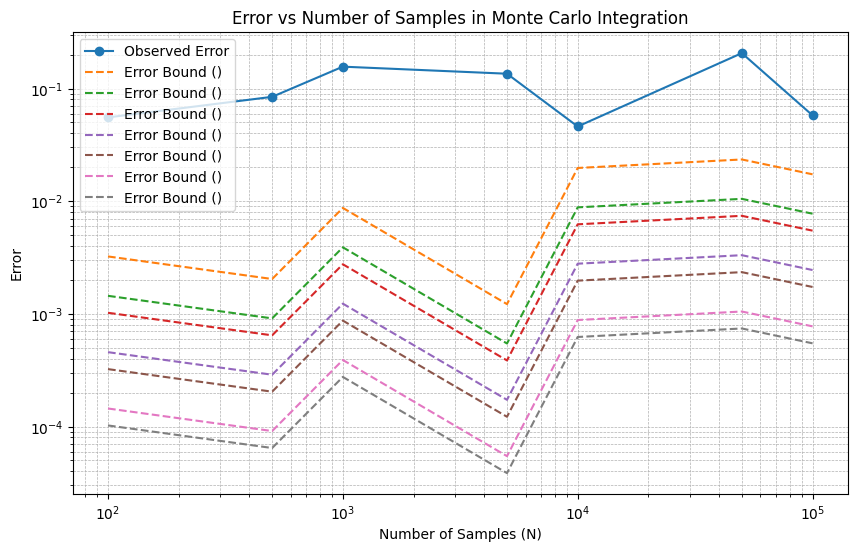

In [11]:

import matplotlib.pyplot as plt
import numpy
N_values = [100, 500, 1000, 5000, 10000, 50000, 100000]
true_value = 0.5577462851  #a calculated approximated value
bounds = [(0, 1), (0, 1)]

estimates = list(map(lambda N: monte_carlo_integration(y, bounds, N), N_values))
errors = list(map(lambda x: abs(x[0] - true_value), estimates))
error_bounds = list(map(lambda x: x[1] / numpy.sqrt(N_values), estimates))

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(N_values, errors, label="Observed Error", marker="o")
plt.loglog(N_values, error_bounds, label="Error Bound ()", linestyle="--")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Error")
plt.title("Error vs Number of Samples in Monte Carlo Integration")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()